In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.describe().corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,-0.178001,0.563941,0.525276,0.520826,0.595319,0.520330,0.520197,0.520196,0.542299,0.520162
CustomerId,-0.178001,1.000000,-0.611922,-0.653787,-0.656178,0.316120,-0.656254,-0.656331,-0.656337,0.459729,-0.656359
CreditScore,0.563941,-0.611922,1.000000,0.997923,0.997586,-0.284164,0.997557,0.997546,0.997546,-0.386757,0.997543
Age,0.525276,-0.653787,0.997923,1.000000,0.999981,-0.320459,0.999978,0.999977,0.999977,-0.430048,0.999977
Tenure,0.520826,-0.656178,0.997586,0.999981,1.000000,-0.325495,1.000000,1.000000,1.000000,-0.434772,1.000000
Balance,0.595319,0.316120,-0.284164,-0.320459,-0.325495,1.000000,-0.325988,-0.326152,-0.326151,0.947805,-0.326172
NumOfProducts,0.520330,-0.656254,0.997557,0.999978,1.000000,-0.325988,1.000000,1.000000,1.000000,-0.435295,1.000000
HasCrCard,0.520197,-0.656331,0.997546,0.999977,1.000000,-0.326152,1.000000,1.000000,1.000000,-0.435435,1.000000
IsActiveMember,0.520196,-0.656337,0.997546,0.999977,1.000000,-0.326151,1.000000,1.000000,1.000000,-0.435437,1.000000
EstimatedSalary,0.542299,0.459729,-0.386757,-0.430048,-0.434772,0.947805,-0.435295,-0.435435,-0.435437,1.000000,-0.435472


In [7]:
df.drop(columns=['RowNumber','CustomerId','Surname'],axis=1, inplace= True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [9]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [10]:
df.replace({'Geography':{'France':0,'Spain':1,'Germany':2}},inplace=True)

C:\Users\ankur\AppData\Local\Temp\ipykernel_8432\2626777245.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Geography':{'France':0,'Spain':1,'Germany':2}},inplace=True)


In [11]:
df.replace({'Gender':{'Male':0,'Female':1}},inplace=True)

C:\Users\ankur\AppData\Local\Temp\ipykernel_8432\1828585573.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Gender':{'Male':0,'Female':1}},inplace=True)


In [12]:
df.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6152,508,0,1,64,2,0.00,1,1,1,6076.62,0
9263,542,0,1,31,3,0.00,2,1,1,115217.59,0
3261,614,0,0,51,3,0.00,2,1,1,5552.37,0
78,757,1,0,33,5,77253.22,1,0,1,194239.63,0
2136,727,0,0,18,4,133550.67,1,1,1,46941.41,0
5582,534,0,0,38,3,0.00,1,0,0,143938.27,0
756,664,2,1,36,2,127160.78,2,1,0,78140.75,0
4243,768,0,1,26,5,51116.26,1,1,1,70454.79,1
1601,834,0,1,49,8,160602.25,2,1,0,129273.94,0
3106,554,0,1,45,6,0.00,2,1,1,181204.50,0


In [13]:
df['Gender'].unique()

array([1, 0], dtype=int64)

In [14]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [40]:
x= df.drop('Exited',axis=1)

In [41]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
dtypes: float64(2), int64(8)
memory usage: 781.4 KB


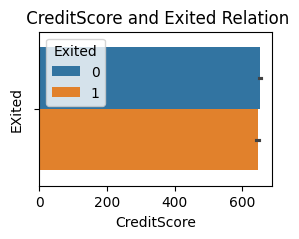

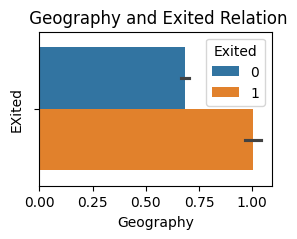

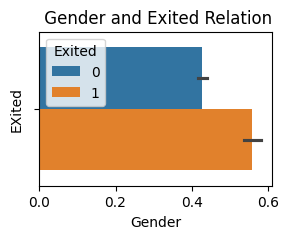

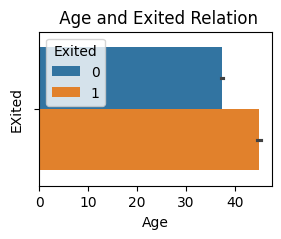

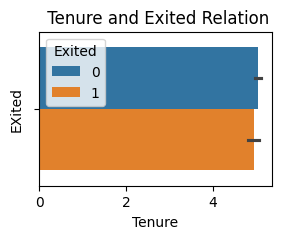

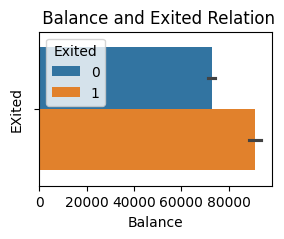

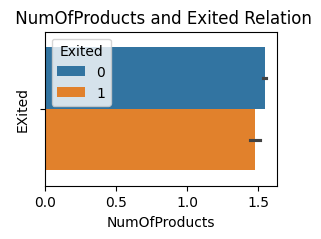

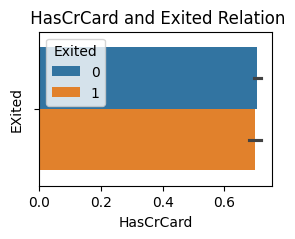

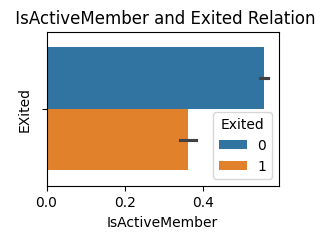

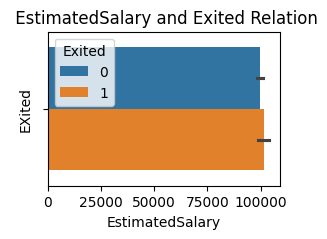

In [16]:
for column in x.columns:
    plt.figure(figsize=(3,2))
    sns.barplot(data=df,x=df[column],hue=df['Exited'] )
    sns.countplot
    plt.xlabel(column) 
    plt.ylabel("EXited")   
    plt.title(f" {column} and Exited Relation")
    plt.show()

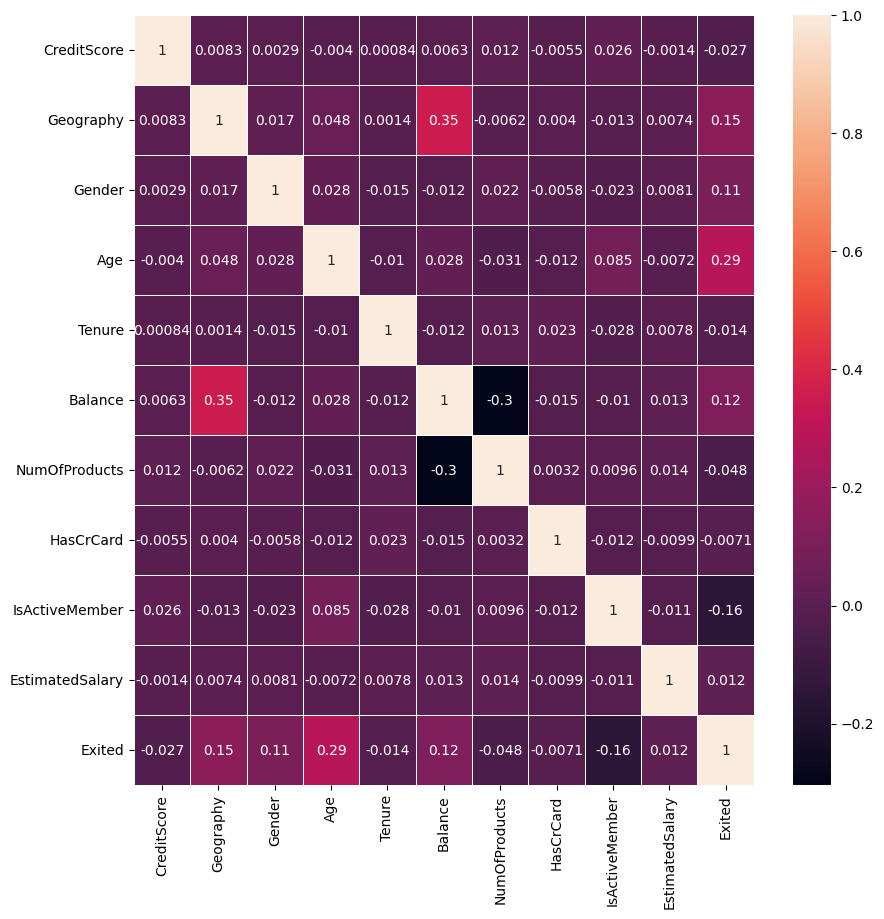

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidth=.5)
plt.show()

In [18]:
# x=x.drop('HasCrCard',axis=1)

In [42]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,1,42,2,0.00,1,1,1,101348.88
1,608,1,1,41,1,83807.86,1,0,1,112542.58
2,502,0,1,42,8,159660.80,3,1,0,113931.57
3,699,0,1,39,1,0.00,2,0,0,93826.63
4,850,1,1,43,2,125510.82,1,1,1,79084.10


### Spliting the Dataset in Training and Testing

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
df.shape

(10000, 11)

In [45]:
x.shape

(10000, 10)

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,df['Exited'],test_size=0.3,random_state = 100)

In [47]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7000, 10), (3000, 10), (7000,), (3000,))

In [48]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, 1191 to 5640
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      7000 non-null   int64  
 1   Geography        7000 non-null   int64  
 2   Gender           7000 non-null   int64  
 3   Age              7000 non-null   int64  
 4   Tenure           7000 non-null   int64  
 5   Balance          7000 non-null   float64
 6   NumOfProducts    7000 non-null   int64  
 7   HasCrCard        7000 non-null   int64  
 8   IsActiveMember   7000 non-null   int64  
 9   EstimatedSalary  7000 non-null   float64
dtypes: float64(2), int64(8)
memory usage: 601.6 KB


### Encoding the data and Standardizing Data

In [49]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

### Loading LR model

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

### Transforming Column Using Column Transformer

In [51]:
from sklearn.compose import ColumnTransformer

In [67]:
tf1 = ColumnTransformer([('Scaling',StandardScaler(),[0,5,8])],remainder='passthrough')

In [68]:
tf2 = RandomForestClassifier(n_estimators=100, criterion='gini')

### Creating Pipeline For LR MOdel

In [69]:
from sklearn.pipeline import Pipeline, make_pipeline

In [70]:
from sklearn import set_config
set_config(display='diagram')

In [71]:
pipe = make_pipeline(tf1,tf2)

In [72]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Scaling', StandardScaler(),
                                                  [0, 5, 8])])),
                ('randomforestclassifier', RandomForestClassifier())])

In [73]:
pred=pipe.predict(x_test)

### Evaluating Model

In [74]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [75]:
acc = accuracy_score(y_test,pred)

In [76]:
acc

0.8616666666666667

In [77]:
acc*100

86.16666666666667

### Dumping the Model

In [64]:
import pickle

In [66]:
pickle.dump(pipe,open('ChurnPredictionRF.pkl','wb'))